In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [3]:
def check_df(dataframe, head=5):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Head #####################")
    print(dataframe.head(head))

In [4]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())

In [5]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [6]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [7]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

In [8]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [9]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [10]:
# order_status별 결측치 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [11]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [12]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

C:\Users\user\AppData\Local\Temp\ipykernel_12068\348787432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)


                                order_id                       customer_id order_status       order_purchase_timestamp              order_approved_at      order_delivered_timestamp  order_estimated_delivery_date           age  gender country payment_type  payment_installments                         seller_id  shipping_charges category1 category2          price  delivery_delay_days  approval_delay_minutes      weight_kg     volume_cm3   review_score marketing_info_agree agegroup        product_id
count                             104899                            104899       104899                         104899                         104899                         102623                         104899  104899.00000  104899  104899       104899         104899.000000                            104899     104899.000000    104899    104899  104899.000000        102623.000000           104899.000000  104899.000000  104899.000000  104899.000000               104899   104899            104

In [13]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
check_df(marketing_delivered)

##################### Shape #####################
(102624, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102624 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102624 non-null  object        
 1   customer_id                    102624 non-null  object        
 2   order_status                   102624 non-null  object        
 3   order_purchase_timestamp       102624 non-null  datetime64[ns]
 4   order_approved_at              102624 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102624 non-null  datetime64[ns]
 7   age                            102624 non-null  int64         
 8   gender                         102624 non-null  object        
 9   country                     

In [14]:
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
check_df(marketing_delivered)

##################### Shape #####################
(102616, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102616 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102616 non-null  object        
 1   customer_id                    102616 non-null  object        
 2   order_status                   102616 non-null  object        
 3   order_purchase_timestamp       102616 non-null  datetime64[ns]
 4   order_approved_at              102616 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102616 non-null  datetime64[ns]
 7   age                            102616 non-null  int64         
 8   gender                         102616 non-null  object        
 9   country                     

In [15]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 1:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [16]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

In [17]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [18]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

In [19]:
# customer_id 기준 구매 횟수 계산
purchase_counts = marketing_delivered.groupby('customer_id')['order_id'].count().reset_index()
purchase_counts.columns = ['customer_id', 'purchase_count']

# 원본 데이터프레임에 merge
marketing_delivered = marketing_delivered.merge(purchase_counts, on='customer_id', how='left')

In [20]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# inf나 NaN 처리
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1이면 대형 물품, 0이면 소형

C:\Users\user\AppData\Local\Temp\ipykernel_12068\1703141147.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12068\1703141147.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [21]:
# Label encoding 변수 category
# category 타입을 item_cat으로 묶어 사용
marketing_delivered['item_cat'] = marketing_delivered['category1'] + '_' + marketing_delivered['category2']
# 카테고리
le = LabelEncoder()
marketing_delivered['item_cat_encoded'] = le.fit_transform(marketing_delivered['item_cat'])
# 카테고리 맵핑
category1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(category1_mapping)

{'가구_1인가구': np.int64(0), '가구_거실장/테이블': np.int64(1), '가구_쇼파': np.int64(2), '가구_수납장/선반': np.int64(3), '가구_야외가구': np.int64(4), '가구_옷장/행거': np.int64(5), '가구_책상/책장': np.int64(6), '가구_침대': np.int64(7), '가구_화장대': np.int64(8), '스포츠용품_골프': np.int64(9), '스포츠용품_낚시': np.int64(10), '스포츠용품_등산': np.int64(11), '스포츠용품_캠핑': np.int64(12), '식품_가공식품': np.int64(13), '식품_건강식품': np.int64(14), '식품_신선식품': np.int64(15), '의류_남성의류': np.int64(16), '의류_스포츠의류': np.int64(17), '의류_여성의류': np.int64(18), '의류_유아의류': np.int64(19), '의류_파티의류': np.int64(20), '전자제품_건강가전': np.int64(21), '전자제품_냉장고': np.int64(22), '전자제품_비데': np.int64(23), '전자제품_세탁기/건조기': np.int64(24), '전자제품_음향가전': np.int64(25), '전자제품_주방가전': np.int64(26), '전자제품_청소기': np.int64(27), '화장품_남성화장품': np.int64(28), '화장품_네일케어': np.int64(29), '화장품_마스크/팩': np.int64(30), '화장품_메이크업': np.int64(31), '화장품_바디케어': np.int64(32), '화장품_선케어': np.int64(33), '화장품_스킨케어': np.int64(34), '화장품_향수': np.int64(35), '화장품_헤어케어': np.int64(36)}


In [22]:
# 마케팅 y = 1 n = 0으로 변환
marketing_delivered['marketing_info_agree'] = marketing_delivered['marketing_info_agree'].map({'y': 1, 'n': 0})

<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

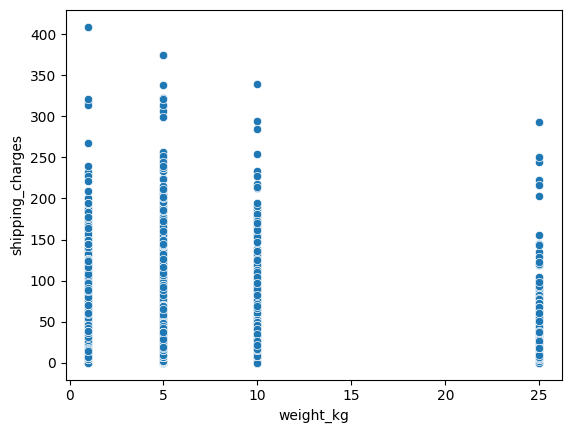

In [23]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')

In [82]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# inf나 NaN 처리
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1이면 대형 물품, 0이면 소형

In [84]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days', # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
    'delay_rate',
    'item_cat_encoded',
    'marketing_info_agree',
    'is_big_product',
    'review_score',
    'age'
]

In [85]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

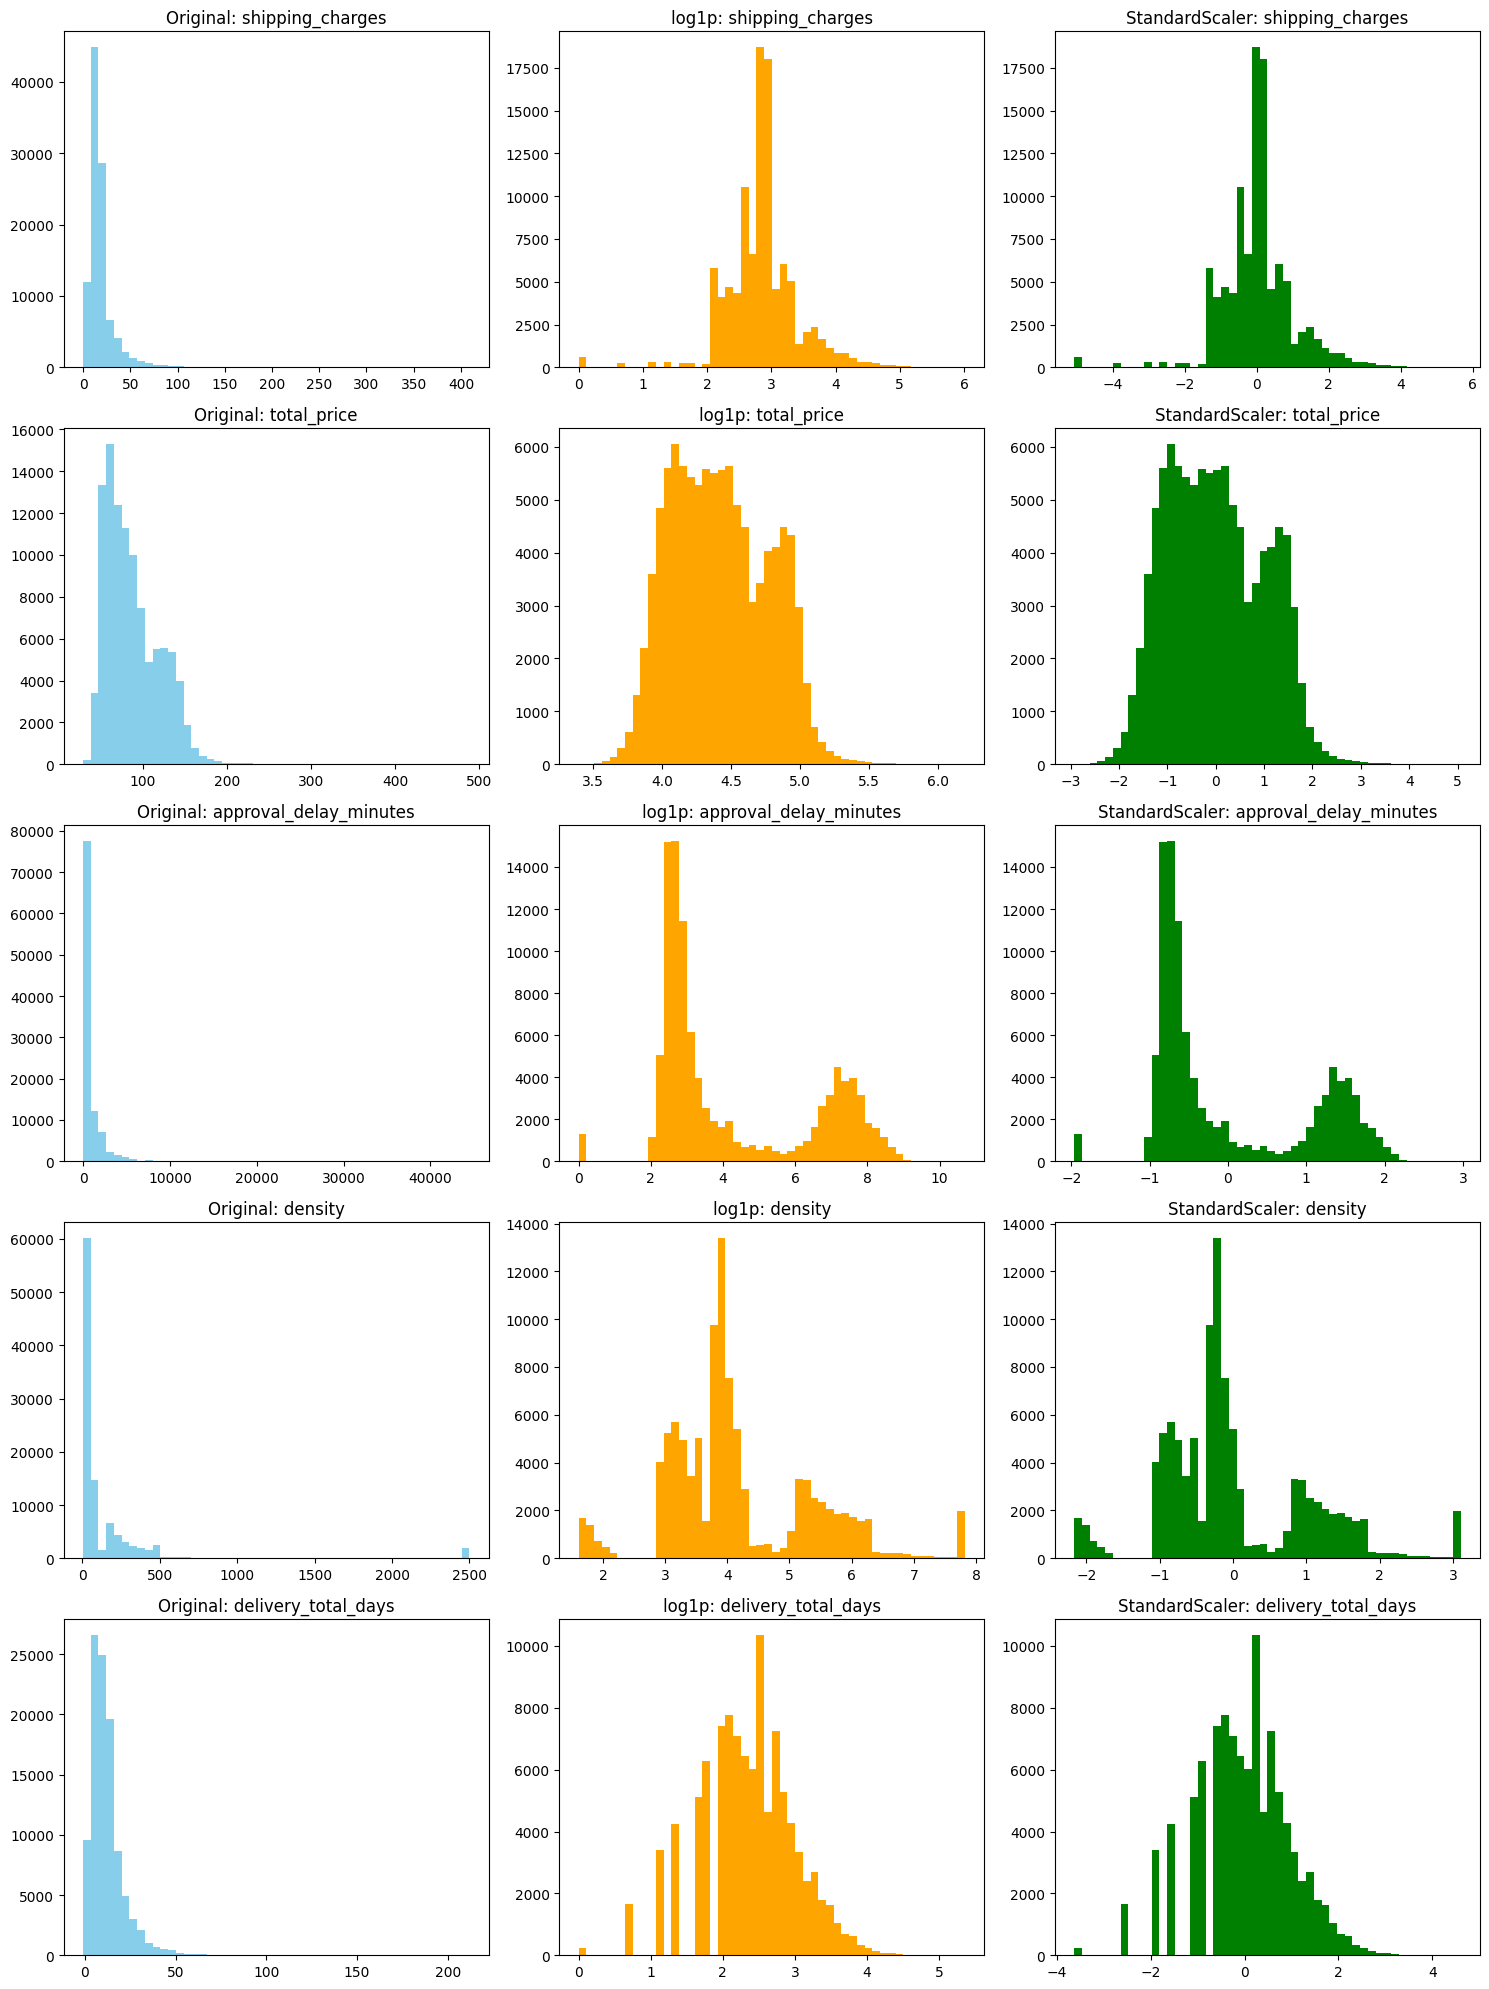

In [27]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [86]:
# 목적별 클러스터링용 데이터프레임 생성
# 1_소비 성향 기반 행동 클러스터_미주 (목표: "서로 다른 구매 성향/패턴을 가진 고객들을 그룹화") / 고가/저가 구매자, 리뷰 불만족 고객 등 분류 가능
df_behavior = marketing_delivered[[
    'std_total_price',
    'std_shipping_charges',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

# 2_배송 민감도 기반 경험 클러스터_인재 (목표: "배송 지연·체감 품질에 따른 고객 분류") / 배송 민감군 , 여유로운 고객 , 저평가 리뷰 유저 등 분류 가능
df_experience = marketing_delivered[[
    'std_delivery_delay_days',
    'std_delivery_total_days',
    'std_approval_delay_minutes',
    'std_delay_rate',
    'std_review_score'
]]

# 3_제품 특성 기반 클러스터_선미 (목표: "구매 제품 유형에 따라 고객을 나눔") / 고가·대형 상품 구매자 , 소형·저가 구매자 등 분류 가능
df_product = marketing_delivered[[
    'std_density',
    'std_total_price',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_review_score'
]]

# 4_혼합 클러스터_상규 (고객 행동 + 배송 경험 + 제품 특성 통합 군집화) / 마케팅 타겟팅, CS 우선 대응, 리텐션 전략에 활용 가능
df_mixed = marketing_delivered[[
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

In [87]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'purchase_count', 'total_price', 'density', 'delivery_total_days', 'delay_rate', 'is_big_product', 'item_cat', 'item_cat_encoded', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days', 'std_delay_rate', 'std_item_cat_encoded', 'std_marketing_info_agree', 'std_is_big_product', 'std_review_score', 'std_age'], dtype='object')

In [88]:
print(df_experience.isnull().sum())

std_delivery_delay_days       0
std_delivery_total_days       0
std_approval_delay_minutes    0
std_delay_rate                0
std_review_score              0
dtype: int64


In [77]:
# approval_delay_minutes 결측치 중앙값으로 대체
median_approval_delay = marketing_delivered['approval_delay_minutes'].median()
marketing_delivered['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)

# 표준화 다시 수행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
marketing_delivered['std_approval_delay_minutes'] = scaler.fit_transform(
    marketing_delivered[['approval_delay_minutes']]
)

# 클러스터링용 데이터프레임 생성
df_experience = marketing_delivered[[
    'std_delivery_delay_days', 'std_delivery_total_days',
    'review_score', 'std_delay_rate','std_approval_delay_minutes'
]]

print(df_experience.isnull().sum()) 


std_delivery_delay_days       0
std_delivery_total_days       0
review_score                  0
std_delay_rate                0
std_approval_delay_minutes    0
dtype: int64


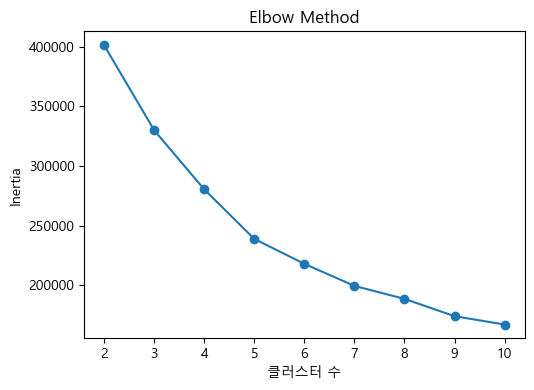

In [ ]:
# Elbow Method 최적의 클러스터 수 찾기
inertia = []
K_range = range(2, 11)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_experience)
    inertia.append(kmeans.inertia_)

# 시각화 Elbow
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("클러스터 수")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

In [117]:
# 최적 클러스터 수 설정
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
df_experience['cluster'] = kmeans.fit_predict(
    df_experience[['std_delivery_delay_days',
                   'std_delivery_total_days',
                   'std_approval_delay_minutes',
                   'std_delay_rate',
                   'std_review_score']]
)

print(df_experience['cluster'].value_counts())

cluster
1    50005
3    27680
0    16050
2     8881
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_12068\118534073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experience['cluster'] = kmeans.fit_predict(


In [118]:
# 군집별 평균 (정규화된 값으로 해석)
cluster_summary = df_experience.groupby('cluster')[['std_delivery_delay_days', 
                                                    'std_delivery_total_days', 
                                                    'std_review_score', 
                                                    'std_delay_rate',
                                                    'std_approval_delay_minutes']].mean()

print(cluster_summary)

         std_delivery_delay_days  std_delivery_total_days  std_review_score  std_delay_rate  std_approval_delay_minutes
cluster                                                                                                                
0                       1.320665                 1.347123          0.001073        0.809556                   -0.232275
1                      -0.246999                -0.179878         -0.007026        0.058158                   -0.650604
2                      -0.716087                -1.646298         -0.031896       -2.410118                   -0.328154
3                      -0.089810                 0.072047          0.022305        0.198796                    1.415312


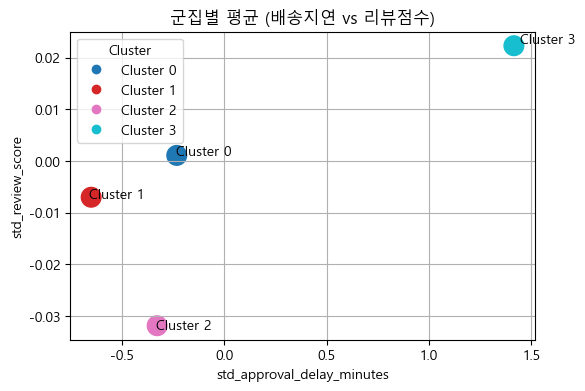

In [119]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6,4))

scatter = plt.scatter(cluster_summary['std_approval_delay_minutes'], 
                      cluster_summary['std_review_score'], 
                      c=cluster_summary.index, s=200, cmap='tab10', label=cluster_summary.index)

for i in cluster_summary.index:
    x = cluster_summary['std_approval_delay_minutes'][i]
    y = cluster_summary['std_review_score'][i]
    plt.text(x + (x * 0.02), y + (y * 0.02),
             f'Cluster {i}', fontsize=10)


plt.title("군집별 평균 (배송지연 vs 리뷰점수)")
plt.xlabel("std_approval_delay_minutes")
plt.ylabel("std_review_score")

handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in cluster_summary.index], title="Cluster", loc="best")

plt.grid(True)
plt.show()


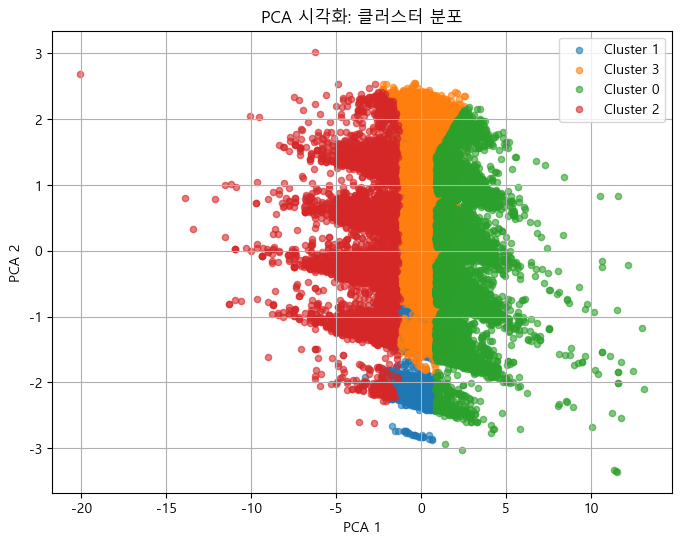

In [120]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_experience.drop(columns=['cluster'], errors='ignore'))
df_pca = pd.DataFrame(pca_result, columns=['PCA 1', 'PCA 2'])
df_pca['cluster'] = df_experience['cluster']

# 시각화
plt.figure(figsize=(8,6))

for cluster_id in df_pca['cluster'].unique():
    subset = df_pca[df_pca['cluster'] == cluster_id]
    plt.scatter(subset['PCA 1'], subset['PCA 2'], s=20, alpha=0.6, label=f'Cluster {cluster_id}')

plt.title("PCA 시각화: 클러스터 분포")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


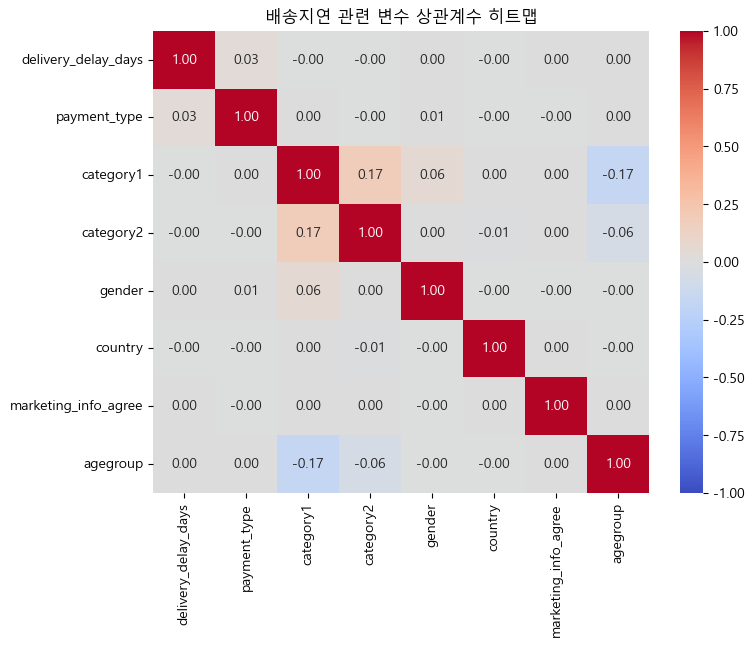

In [98]:
# 후보 변수 + 배송지연 변수 선택
cols_for_corr = [
    "delivery_delay_days", "payment_type", "category1", "category2",
    "gender", "country", "marketing_info_agree", "agegroup"
]

# 범주형 → 수치형 인코딩 (Label Encoding)
from sklearn.preprocessing import LabelEncoder

df_corr = marketing_delivered[cols_for_corr].copy()
le = LabelEncoder()

for col in df_corr.columns:
    if df_corr[col].dtype == "object":
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# 상관계수 계산
corr = df_corr.corr()

# 히트맵 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("배송지연 관련 변수 상관계수 히트맵")
plt.show()



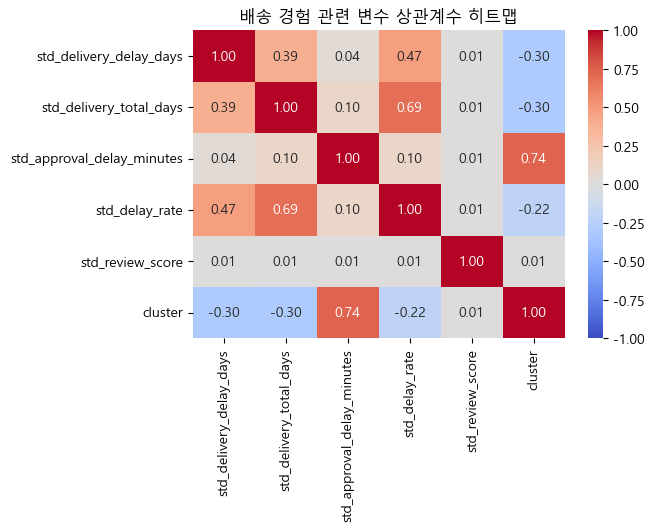

In [99]:
# 상관계수 계산
corr = df_experience.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("배송 경험 관련 변수 상관계수 히트맵")
plt.show()

In [102]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_experience['cluster'].values

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df

,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,1458143.31,90.850050,16050,15115,96.469951,1.061859
1,1,4353018.41,87.051663,50005,45827,94.988073,1.091169
2,2,731813.63,82.402165,8881,8170,89.573272,1.087026
3,3,2439464.55,88.130945,27680,25710,94.883880,1.076624


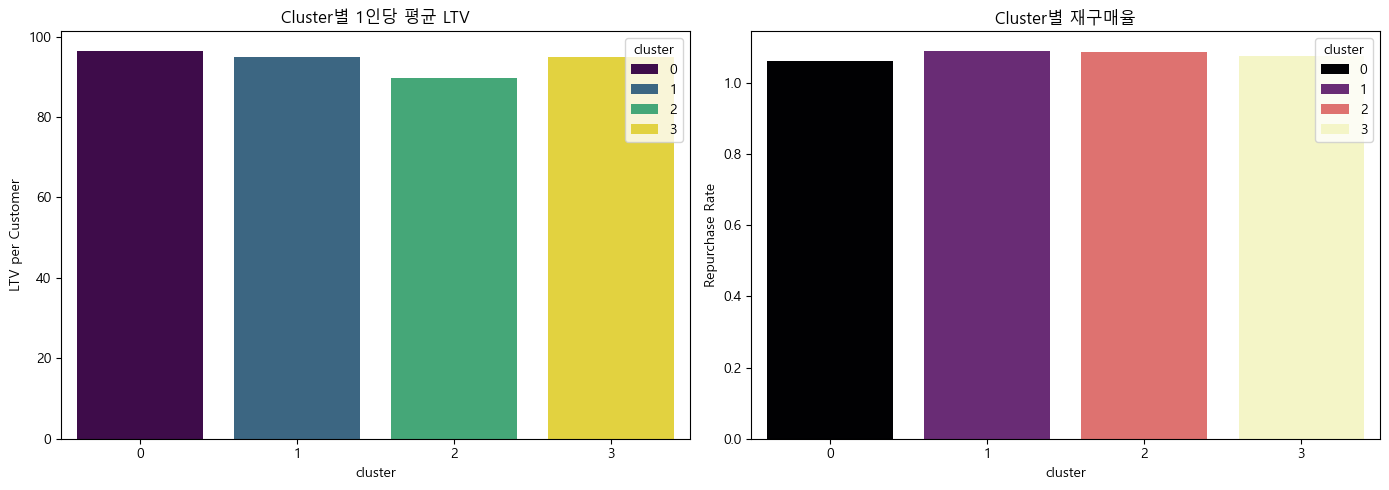

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

In [ ]:
'''
0번 : 배송 지연 수용 고객군
배송 지연 많음, 소요일 가장 김, 리뷰 점수 보통, 결제 승인 빠름

마케팅 전략
신제품/예약 판매 타깃
→ 배송이 느린 고가 상품, 예약 상품에 긍정적 반응 가능

프리미엄 멤버십 제안
→ "배송 기간이 길어도 희소성 있는 상품"에 대한 수요를 활용

리뷰 개선 캠페인
→ 보통 수준의 리뷰를 긍정적으로 유도 (포인트/쿠폰 제공)

1번 : 저평가 리뷰 고객군
배송 지연 거의 없음, 소요일 짧음, 리뷰 점수 가장 낮음, 결제 승인 빠름

마케팅 전략
품질 개선 + 사후 케어 집중
→ 배송 문제가 아닌 상품 품질이나 설명과의 불일치가 주요 불만 요소일 가능성

리뷰 피드백 프로그램
→ 불만족 원인을 직접 수집, 개선 후 쿠폰 지급

브랜드 신뢰도 강화 캠페인
→ SNS, 오프라인 후기, 고객 스토리 등을 활용한 긍정적 이미지 구축

2번 : 여유로운 고객군
배송 지연 적음, 소요일 짧음, 리뷰 점수 가장 높음, 결제 승인 빠름

마케팅 전략
VIP/로열티 프로그램 강화
→ 장기 충성 고객으로 유도

고가·프리미엄 상품 크로스셀링
→ 긍정적 경험이 많아 추가 구매 가능성 높음

리뷰 활용 마케팅
→ 긍정 리뷰를 다른 고객에게 노출하여 전환율 상승

3번 : 승인 지연 불만 고객군
배송 지연 보통, 소요일 약간 김, 리뷰 점수 보통, 결제 승인 매우 느림

마케팅 전략
결제 승인 프로세스 개선
→ 간편결제, 승인 속도 향상 시스템 도입

배송 상태 실시간 안내
→ 승인 지연 동안 고객 불안을 줄이는 알림 서비스

보상 쿠폰 지급
→ 승인 지연에 대한 사과 및 재구매 유도'''